In [1]:
import pandas as pd
import numpy as np

In [17]:
# path='/content/drive/MyDrive/Colab Notebooks/ML practical/Processed_data.csv'
path = "C:/Users/vishal/MLT Project/Accident_Severity_Prediction_datasets/Processed_data.csv"
data=(pd.read_csv(path)).drop("Unnamed: 0", axis=1)
# data=pd.read_csv(path)

In [19]:
data.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,3,0.000,72.0,72.000000,26.0,10.0,6,10.0,16,0,...,0.011294,-0.023450,0.009454,-0.007929,0.000032,-0.007039,-0.011485,0.015448,-0.012006,-0.003866
1,4,1.002,91.8,54.472104,48.0,10.0,22,18.4,6,0,...,0.039491,0.021280,-0.005106,-0.015760,0.016425,0.039872,-0.047719,-0.000016,-0.013681,-0.010934
2,1,0.000,91.0,91.000000,38.0,10.0,20,7.0,16,0,...,0.012038,0.099881,0.019001,0.063796,0.002496,0.006196,0.051213,-0.014346,-0.050256,-0.007663
3,4,1.500,77.0,77.000000,40.0,10.0,10,12.0,91,0,...,0.008458,-0.063279,-0.003959,-0.030436,-0.020446,-0.017096,-0.009632,0.055119,0.063940,0.017744
4,4,0.180,73.0,54.472104,26.0,10.0,10,15.0,91,0,...,-0.047187,0.015230,0.064401,0.005247,-0.016908,-0.042391,0.024430,-0.047003,0.015520,0.032127


In [26]:
data.shape

(256574, 127)

In [28]:
data.size

32584898

# KNN Model Trainaing

### Import required libraries

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Set Feature and Target columns

In [33]:
X=data.drop(columns=['Severity'])
y=data['Severity']

### Split data into training and testing data

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Standerdize the data using StandardScaler()

In [40]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [42]:
print("Data has been loaded, split, and scaled.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data has been loaded, split, and scaled.
Training set shape: (192430, 126)
Testing set shape: (64144, 126)


### Creating KNN Model with n_neighbors=15

In [45]:
knn=KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
knn.fit(X_train,y_train)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


### Predciting using KNN(n=15)

In [47]:
y_pred_knn=knn.predict(X_test)

In [49]:
print("Accuracy score:",accuracy_score(y_test,y_pred_knn)*100)

Accuracy score: 82.68115490147169


# Finding Best K value

In [52]:
accuracy=[]
for i in range(3,30,2):
  knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
  knn.fit(X_train,y_train)
  # y_train_pred=knn1.predict(X_train)
  # y_test_pred=knn1.predict(X_test)
  # training_acc=accuracy_score(y_train, y_train_pred)
  # testing_acc=accuracy_score(y_test, y_test_pred)
  # noraml_acc.append([training_acc,testing_acc])
  train_acc = accuracy_score(knn.predict(X_train), y_train)
  test_acc = accuracy_score(knn.predict(X_test), y_test)
  accuracy.append([train_acc, test_acc])

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

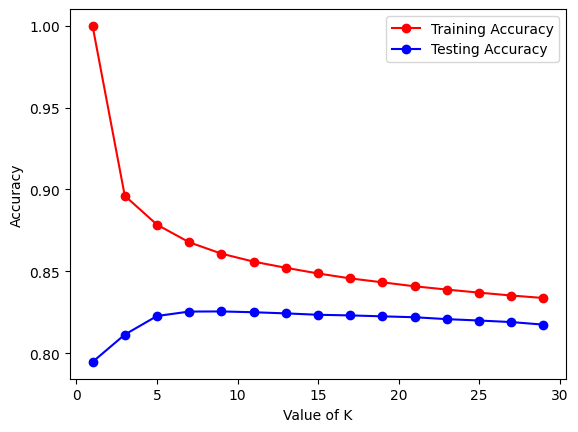

In [ ]:
plt.plot(np.arange(1,30,2), [x[0] for x in noraml_acc], 'ro-', label='Training Accuracy')
plt.plot(np.arange(1,30,2), [x[1] for x in noraml_acc], 'bo-', label='Testing Accuracy')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#Best value of K is

### Finding Best K values using 

In [ ]:
neighbors = range(1, 35)
train_accuracy1 = np.empty(len(neighbors))
test_accuracy1 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)

    train_accuracy1[i] = kn.score(X_train, y_train)
    test_accuracy1[i] = kn.score(X_test, y_test)

# Find the K value with the highest test accuracy
best_k_train=neighbors[np.argmax(train_accuracy1)]
best_k = neighbors[np.argmax(test_accuracy1)]
print(f"The best performing K value is: {best_k_train} with a training accuracy of {max(train_accuracy1):.4f}")
print(f"The best performing K value is: {best_k} with a test accuracy of {max(test_accuracy1):.4f}")

# Create a KNN classifier with the best K value



In [59]:
## Form the above conclusion we find best values for k in 23
best_k = 23
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

In [60]:
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Evaluation (K = {best_k})")
print(f"Accuracy: {final_accuracy:.4f}\n")

Final Model Evaluation (K = 23)
Accuracy: 0.8230



## Final Model (k=23) and Test Accuracy : 82%

## Classification Report

In [61]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

--- Classification Report ---
              precision    recall  f1-score   support

           1       0.82      0.90      0.86     15407
           2       0.92      0.64      0.76     16239
           3       0.71      0.92      0.80     16370
           4       0.92      0.83      0.87     16128

    accuracy                           0.82     64144
   macro avg       0.84      0.82      0.82     64144
weighted avg       0.84      0.82      0.82     64144



## Confusion matrix


--- Confusion Matrix ---


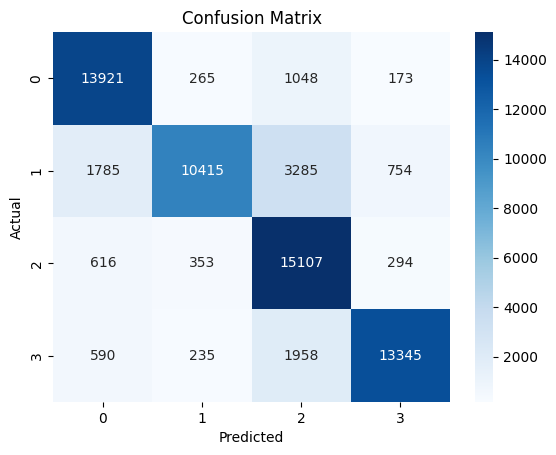

In [70]:
# Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()